In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import matplotlib.pyplot.legend as legend
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data_to_load)
rider_df=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
CityRide_merge=pd.merge(city_df, rider_df, how='outer', on='city')

# Display the data table for preview
CityRide_merge.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
#create summary by city
temp_dict_list = []
for city in CityRide_merge["city"].unique():
    temp_dict={"City Name": CityRide_merge.loc[CityRide_merge["city"]==city]["city"].max(),
               "City Type": CityRide_merge.loc[CityRide_merge["city"]==city]["type"].max(),
               "Driver Count": CityRide_merge.loc[CityRide_merge["city"]==city]["driver_count"].max(),
               "Avg Fare": CityRide_merge.loc[CityRide_merge["city"]==city]["fare"].mean(), 
               "Total Fare": CityRide_merge.loc[CityRide_merge["city"]==city]["fare"].sum(),
               "Ride Count": CityRide_merge.loc[CityRide_merge["city"]==city]["ride_id"].count()}
    temp_dict_list.append(temp_dict)
CitySummary = pd.DataFrame(temp_dict_list)

CitySummary.head()


,City Name,City Type,Driver Count,Avg Fare,Total Fare,Ride Count
0,Richardfort,Urban,38,22.373214,626.45,28
1,Williamsstad,Urban,59,24.362174,560.33,23
2,Port Angela,Urban,67,23.836842,452.90,19
3,Rodneyfort,Urban,34,28.616957,658.19,23
4,West Robert,Urban,39,25.123871,778.84,31


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [24]:
# Obtain the x and y coordinates for each of the three city types
x_axis = CitySummary["Ride Count"]
y_axis= CitySummary["Avg Fare"]
size = (CitySummary["Driver Count"]*10)
labels = ['Urban', 'Suburban', 'Rural']
colors = []

for color in CitySummary["City Type"]:
    if color=="Urban":
        colors.append("coral")
    elif color=="Suburban":
        colors.append("skyblue")
    elif color=="Rural":
        colors.append("gold")


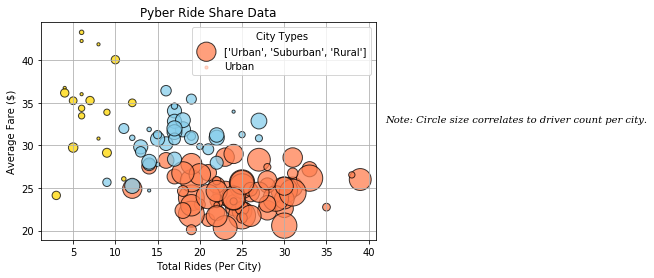

In [40]:
# Build the scatter plots for each city types
plt.scatter(x_axis, y_axis, marker="o", color=colors, label=labels, edgecolors="black", s=size, alpha=0.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Share Data")
plt.xlabel("Total Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
#plt.legend(labels, loc="best", title="City Types")
# we'll plot empty lists with the desired size and label
for area in ['Urban']:
    plt.scatter([], [], c='coral', alpha=0.3, s=10, label='Urban')
    
plt.legend(scatterpoints=1, frameon=True, labelspacing=0.5, title='City Types')

# Incorporate a text label regarding circle size
plt.text(42, 33, 'Note: Circle size correlates to driver count per city.',family='serif', style='italic', 
         ha='left', va='center', wrap=True)

# Save Figure
#plt.savefig("PyberRide.png")
plt.show()

In [30]:
# Show plot
plt.show()

## Total Fares by City Type

In [45]:
# Calculate Type Percents
CityTypePct = CitySummary.groupby(["City Type"])["Total Fare", "Ride Count"].sum()
CityTypePct.head()


,Total Fare,Ride Count
City Type,,
Rural,4327.93,125
Suburban,19356.33,625
Urban,39854.38,1625


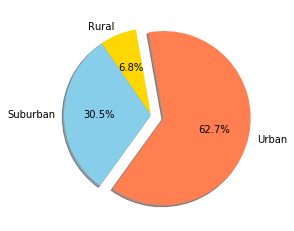

In [46]:
# Build Pie Chart
sizes = CityTypePct["Total Fare"]
explode = (0, 0, 0.15)
labels2 = ["Rural", "Suburban", "Urban"]
colors2 = ["gold", "skyblue", "coral"]
plt.pie(sizes, explode=explode, labels=labels2, colors=colors2,
        autopct="%1.1f%%", shadow=True, startangle=100)

# Save Figure
plt.savefig("PyberTotalFares.jpeg")

# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


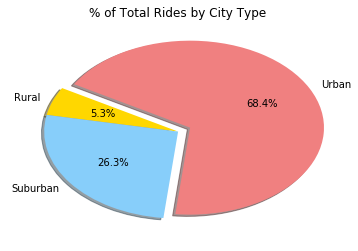

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


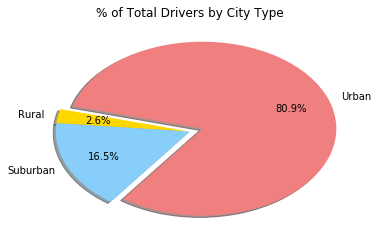

In [6]:
# Show Figure
plt.show()